## Problem A: General linear model

In [1]:
setwd("~/Desktop/DTU/Advanced\ Dataanalysis\ and\ Statistical\ Modelling/Assignments")
## Read the .txt file holding the data
HE <- read.table("clothingSum.csv", sep=",", header=TRUE, as.is=TRUE)

In [2]:
str(HE)

'data.frame':	136 obs. of  6 variables:
 $ subjId: int  11 17 19 29 35 43 47 49 51 55 ...
 $ day   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ clo   : num  0.71 0.65 0.87 0.56 0.34 ...
 $ tOut  : num  20.5 16.6 14.5 20.2 25.3 ...
 $ tInOp : num  25.4 23.2 24.6 27 28.6 ...
 $ sex   : chr  "female" "female" "female" "female" ...


In [3]:
summary(HE)

     subjId           day             clo              tOut      
 Min.   : 11.0   Min.   :1.000   Min.   :0.2467   Min.   :11.93  
 1st Qu.: 59.0   1st Qu.:1.000   1st Qu.:0.4700   1st Qu.:18.57  
 Median : 99.0   Median :2.000   Median :0.5483   Median :21.01  
 Mean   :101.1   Mean   :1.978   Mean   :0.5511   Mean   :21.54  
 3rd Qu.:141.0   3rd Qu.:3.000   3rd Qu.:0.6412   3rd Qu.:24.25  
 Max.   :199.0   Max.   :4.000   Max.   :0.9600   Max.   :33.08  
     tInOp           sex           
 Min.   :23.11   Length:136        
 1st Qu.:26.01   Class :character  
 Median :26.94   Mode  :character  
 Mean   :26.82                     
 3rd Qu.:27.48                     
 Max.   :29.55                     

In [4]:
head(HE)

subjId,day,clo,tOut,tInOp,sex
11,1,0.71,20.48765,25.44297,female
17,1,0.65,16.55730,23.16285,female
19,1,0.87,14.54109,24.55617,female
29,1,0.56,20.21969,27.01763,female
35,1,0.34,25.25117,28.61374,male
43,1,0.79,25.22943,27.07381,female


### Correlation plots


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] "clo"   "tOut"  "tInOp"

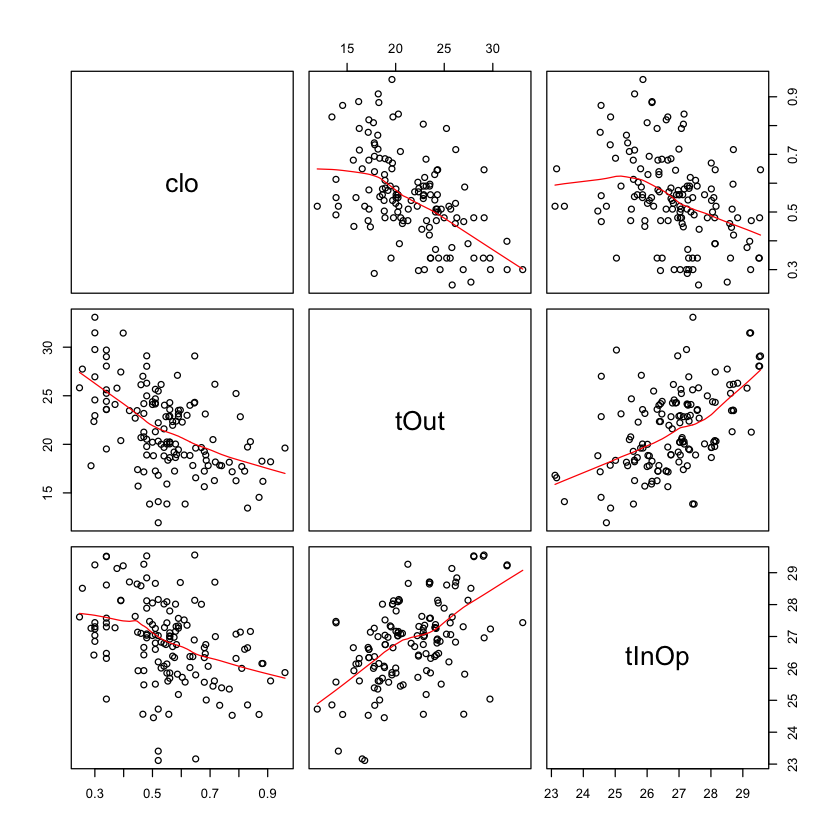

In [5]:
library(dplyr)
myvars <- names(HE) %in% c("sex", "subjId", "day")
HE_subset <- HE[!myvars]
names(HE_subset)
attach(HE_subset)
pairs(HE_subset,panel=panel.smooth)

In [6]:
cov(HE_subset)
cor(HE_subset)
library(corrplot)
corrplot(cor(HE_subset))

,clo,tOut,tInOp
clo,0.02295290,-0.3220363,-0.07552588
tOut,-0.32203627,17.2760368,2.79966891
tInOp,-0.07552588,2.7996689,1.69431442


,clo,tOut,tInOp
clo,1.0000000,-0.5114038,-0.3829834
tOut,-0.5114038,1.0000000,0.5174729
tInOp,-0.3829834,0.5174729,1.0000000


ERROR: Error in library(corrplot): there is no package called ‘corrplot’


In [7]:
library(tree)
model<-tree(clo~.,data=HE_subset)
plot(model)
text(model)

ERROR: Error in library(tree): there is no package called ‘tree’


### Plots with confidence intervals

Loading required package: nlme

Attaching package: ‘nlme’

The following object is masked from ‘package:dplyr’:

    collapse

This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.


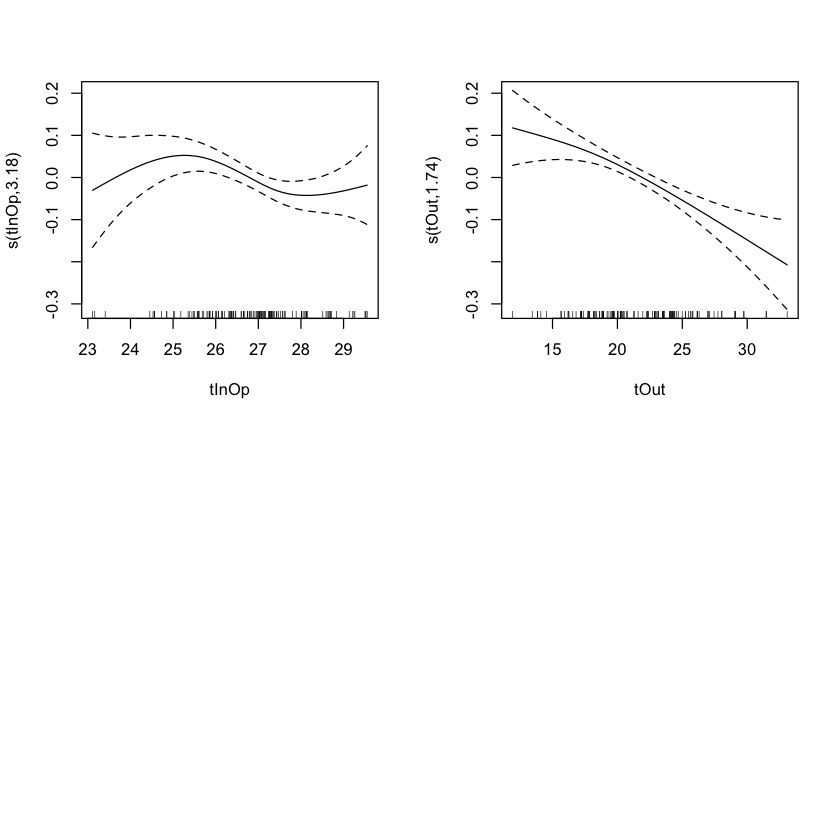

In [8]:
library(mgcv)
par(mfrow=c(2,2))
model<-gam(clo~s(tInOp)+s(tOut),data=HE_subset)
plot(model)

### Histogram for the temperature

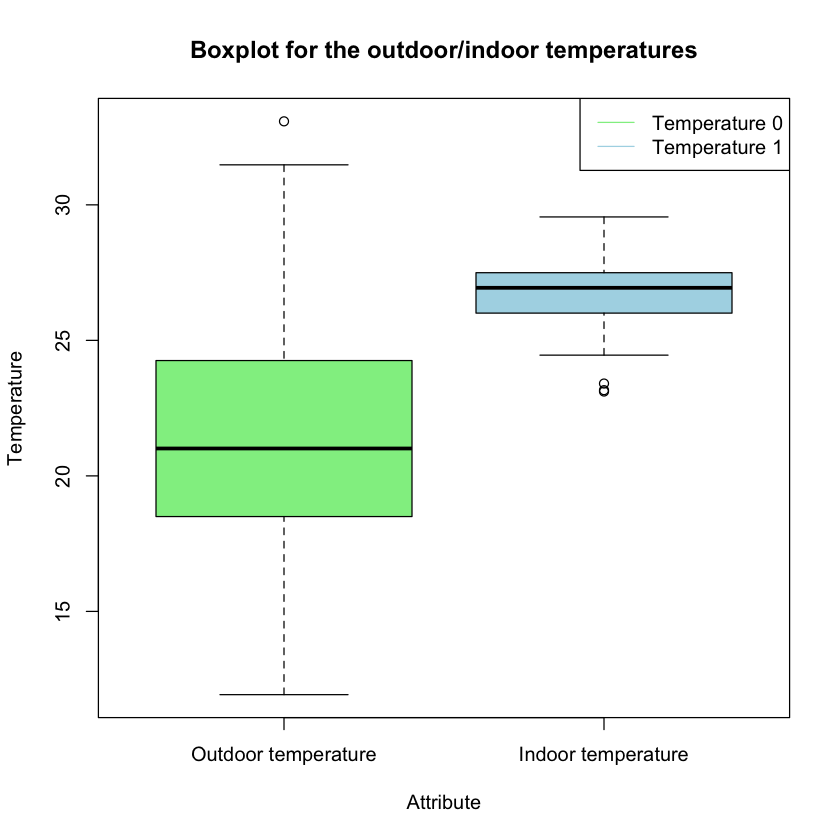

In [9]:
boxplot(HE$tOut, HE$tInOp,
        names=c("Outdoor temperature", "Indoor temperature"), 
        xlab="Attribute", ylab="Temperature", main="Boxplot for the outdoor/indoor temperatures", col=c("lightgreen","Lightblue"))
legend("topright", paste0("Temperature ", 0:1), lty=1, col=c("lightgreen","lightblue"))

In [10]:
fem <- subset(HE, (sex == 'female'));
male <- subset(HE, (sex == 'male'));

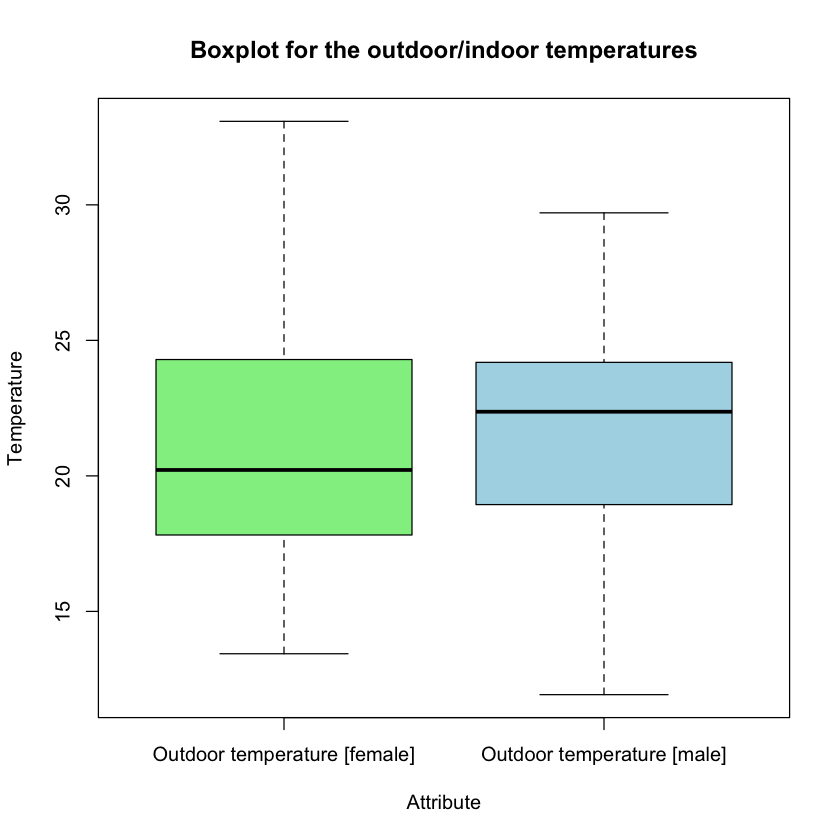

In [11]:
boxplot(fem$tOut, male$tOut,
        names=c("Outdoor temperature [female]", "Outdoor temperature [male]"), 
        xlab="Attribute", ylab="Temperature", main="Boxplot for the outdoor/indoor temperatures", col=c("lightgreen","Lightblue"))

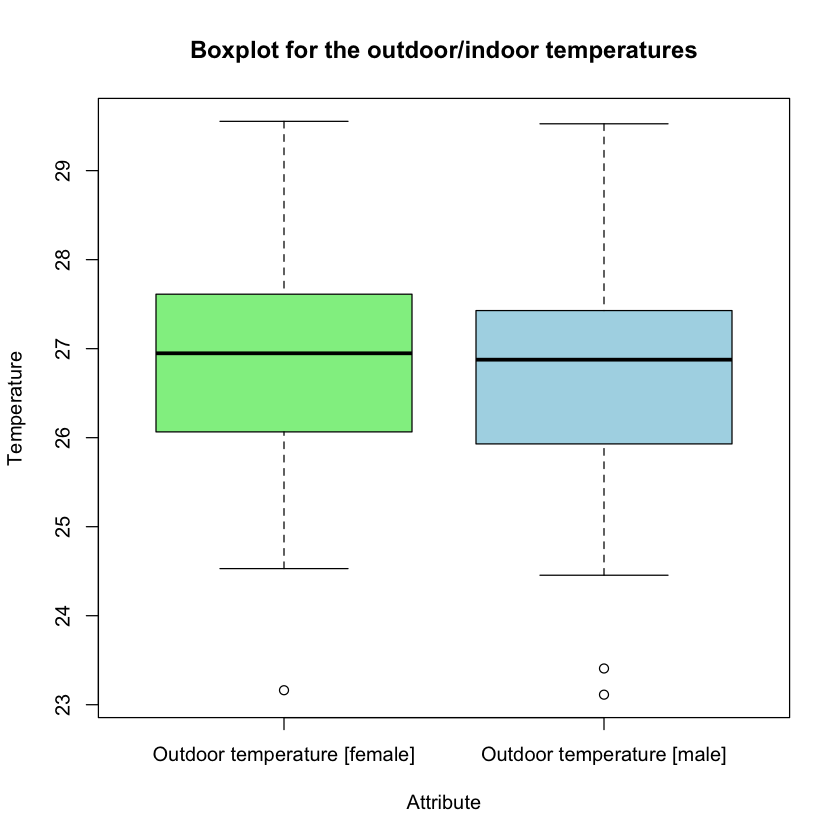

In [12]:
boxplot(fem$tInOp, male$tInOp,
        names=c("Outdoor temperature [female]", "Outdoor temperature [male]"), 
        xlab="Attribute", ylab="Temperature", main="Boxplot for the outdoor/indoor temperatures", col=c("lightgreen","Lightblue"))

### clo vs outdoor temperature

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message in predict.lm(fit_tOut, interval = "prediction"):
“predictions on current data refer to _future_ responses
”

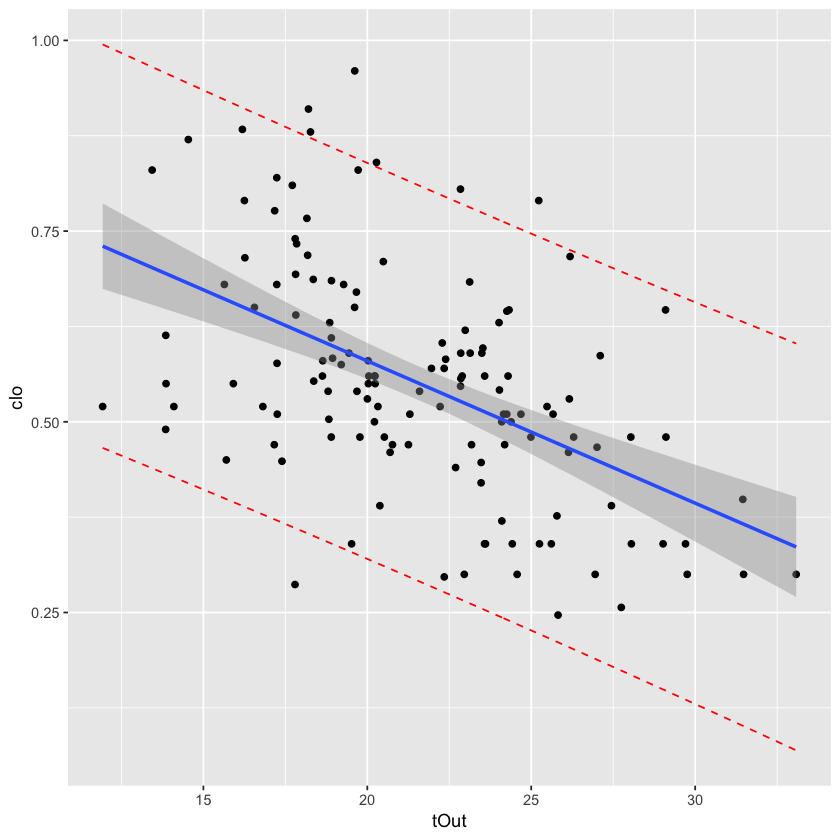

In [16]:
library("ggplot2")
# 1. Add predictions 
fit_tOut <- lm(clo ~ tOut, data = HE)
pred.int <- predict(fit_tOut, interval = "prediction")
mydata <- cbind(HE, pred.int)

# 2. Regression line + confidence intervals
p <- ggplot(mydata, aes(tOut, clo)) + geom_point() + stat_smooth(method = lm)

# 3. Add prediction intervals
p + geom_line(aes(y = lwr), color = "red", linetype = "dashed") + geom_line(aes(y = upr), color = "red", linetype = "dashed")

### clo vs indoor temperature

Warning message in predict.lm(fit_tInOp, interval = "prediction"):
“predictions on current data refer to _future_ responses
”

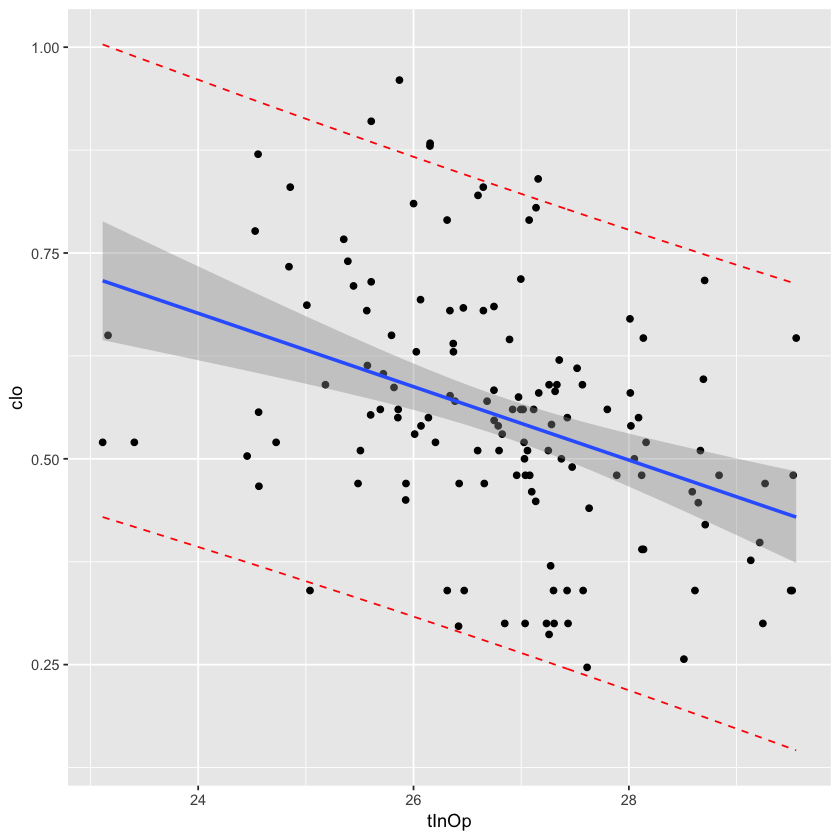

In [17]:
fit_tInOp <- lm(clo ~ tInOp, data = HE)
pred.int <- predict(fit_tInOp, interval = "prediction")
mydata <- cbind(HE, pred.int)
p <- ggplot(mydata, aes(tInOp, clo)) + geom_point() + stat_smooth(method = lm)
p + geom_line(aes(y = lwr), color = "red", linetype = "dashed") + geom_line(aes(y = upr), color = "red", linetype = "dashed")

### Develop a linear model


Call:
lm(formula = clo ~ sex + tOut + tInOp + tOut:tInOp + I(tOut^2) + 
    I(tInOp^2), data = HE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33875 -0.06041  0.00945  0.06036  0.30827 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.2567226  3.4523814  -0.654   0.5145    
sexmale     -0.0873497  0.0216329  -4.038  9.2e-05 ***
tOut        -0.0537481  0.0647313  -0.830   0.4079    
tInOp        0.2965094  0.2886931   1.027   0.3063    
I(tOut^2)   -0.0012796  0.0005668  -2.258   0.0257 *  
I(tInOp^2)  -0.0075203  0.0061133  -1.230   0.2209    
tOut:tInOp   0.0036060  0.0027125   1.329   0.1861    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1209 on 129 degrees of freedom
Multiple R-squared:  0.3915,	Adjusted R-squared:  0.3632 
F-statistic: 13.84 on 6 and 129 DF,  p-value: 4.237e-12


ERROR: Error in library(car): there is no package called ‘car’


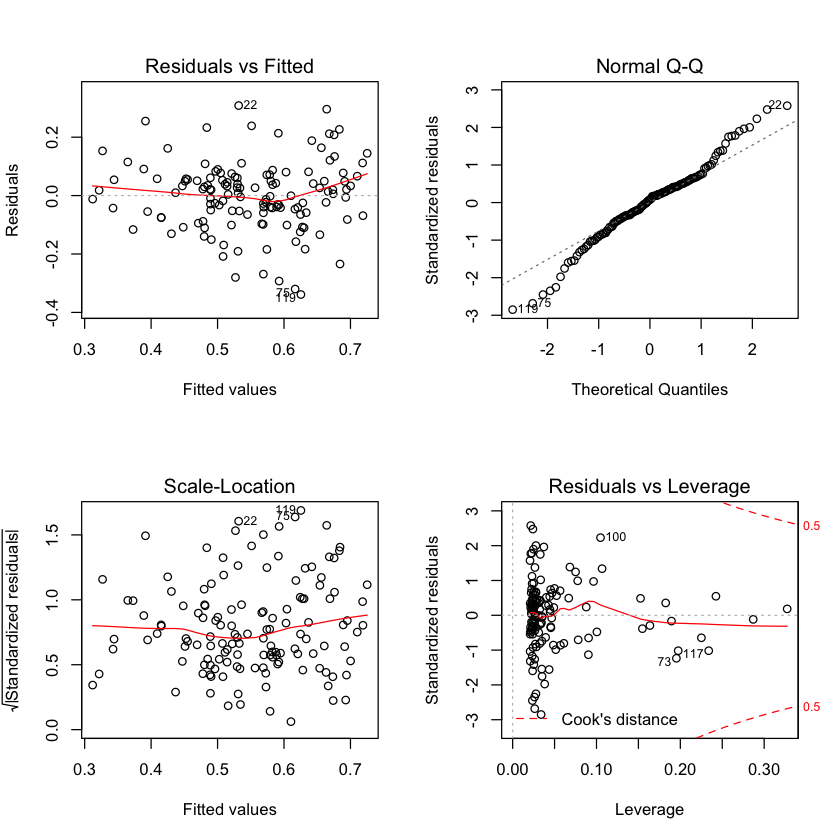

In [21]:
model1<-lm(clo~sex+tOut+tInOp+tOut:tInOp+I(tOut^2)+I(tInOp^2), data = HE)
summary(model1)
par(mfrow=c(2,2))
plot(model1)
library(MASS)
boxcox(model1)
library(car)
qqPlot(model1,reps=10000)
qqPlot(model1,simulate=FALSE)

### log scale


Call:
lm(formula = log(clo) ~ sex + tOut + tInOp + tOut:tInOp + I(tOut^2) + 
    I(tInOp^2), data = HE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74757 -0.09851  0.03919  0.12947  0.53161 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -3.213774   6.691002  -0.480  0.63182   
sexmale     -0.125291   0.041926  -2.988  0.00336 **
tOut        -0.043253   0.125455  -0.345  0.73083   
tInOp        0.303820   0.559511   0.543  0.58806   
I(tOut^2)   -0.002745   0.001099  -2.499  0.01372 * 
I(tInOp^2)  -0.008603   0.011848  -0.726  0.46908   
tOut:tInOp   0.005075   0.005257   0.965  0.33619   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2343 on 129 degrees of freedom
Multiple R-squared:  0.3707,	Adjusted R-squared:  0.3415 
F-statistic: 12.67 on 6 and 129 DF,  p-value: 3.333e-11


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,1.885396,-567.8783,NA,NA
sex,1,0.23828991,2.123686,-553.6922,16.303949,9.199966e-05
I(tOut^2),1,0.07449054,1.959886,-564.6085,5.096691,2.565222e-02
I(tInOp^2),1,0.02211711,1.907513,-568.2922,1.513267,2.208799e-01
tOut:tInOp,1,0.02583103,1.911227,-568.0277,1.767376,1.860534e-01


ERROR: Error in qqPlot(model1a, reps = 10000): could not find function "qqPlot"


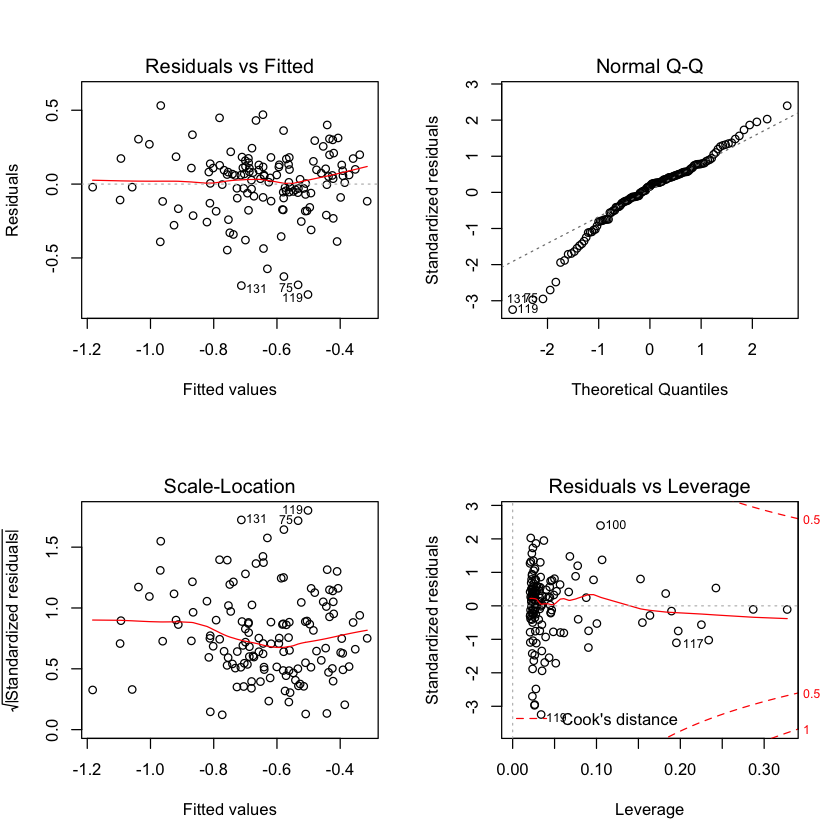

In [22]:
model1a<-lm(log(clo)~sex+tOut+tInOp+tOut:tInOp+I(tOut^2)+I(tInOp^2), data = HE)
summary(model1a)
par(mfrow=c(2,2))
plot(model1a)
drop1(model1,test="F")
qqPlot(model1a,reps=10000)
qqPlot(model1a,simulate=FALSE)

### The most insignificiant 2-way interaction is Temp:Rain

In [23]:
model2a<-update(model1a,~. -tInOp)
summary(model2a)
drop1(model2a,test="F")


Call:
lm(formula = log(clo) ~ sex + tOut + I(tOut^2) + I(tInOp^2) + 
    tOut:tInOp, data = HE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74926 -0.10226  0.04114  0.13103  0.51868 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.3710075  1.0866043   0.341  0.73333   
sexmale     -0.1278687  0.0415436  -3.078  0.00254 **
tOut        -0.0009026  0.0979987  -0.009  0.99267   
I(tOut^2)   -0.0027357  0.0010954  -2.497  0.01376 * 
I(tInOp^2)  -0.0022463  0.0018187  -1.235  0.21903   
tOut:tInOp   0.0034640  0.0043284   0.800  0.42501   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2337 on 130 degrees of freedom
Multiple R-squared:  0.3693,	Adjusted R-squared:  0.3451 
F-statistic: 15.22 on 5 and 130 DF,  p-value: 9.203e-12


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,7.098048,-389.5856,NA,NA
sex,1,0.51726703,7.615315,-382.0191,9.4736911,0.002542849
I(tOut^2),1,0.34055499,7.438603,-385.2122,6.2372286,0.013758053
I(tInOp^2),1,0.08328843,7.181336,-389.9990,1.5254188,0.219028853
tOut:tInOp,1,0.03496896,7.133017,-390.9172,0.6404529,0.425006895


In [24]:
model2b<-update(model2a,~. -tOut)
summary(model2b)
drop1(model2b,test="F")


Call:
lm(formula = log(clo) ~ sex + I(tOut^2) + I(tInOp^2) + tOut:tInOp, 
    data = HE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74943 -0.10231  0.04114  0.13105  0.51910 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.3612190  0.2256134   1.601  0.11177   
sexmale     -0.1279555  0.0403054  -3.175  0.00187 **
I(tOut^2)   -0.0027341  0.0010769  -2.539  0.01229 * 
I(tInOp^2)  -0.0022315  0.0008581  -2.601  0.01038 * 
tOut:tInOp   0.0034277  0.0017981   1.906  0.05880 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2328 on 131 degrees of freedom
Multiple R-squared:  0.3693,	Adjusted R-squared:  0.3501 
F-statistic: 19.18 on 4 and 131 DF,  p-value: 1.946e-12


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,7.098053,-391.5855,NA,NA
sex,1,0.5460833,7.644136,-383.5054,10.078385,0.001870219
I(tOut^2),1,0.3492790,7.447332,-387.0527,6.446212,0.012288562
I(tInOp^2),1,0.3664465,7.464499,-386.7395,6.763052,0.010375591
tOut:tInOp,1,0.1969042,7.294957,-389.8641,3.634019,0.058800327


In [25]:
model2c<-update(model2b,~. -tOut:tInOp)
summary(model2c)
drop1(model2c,test="F")


Call:
lm(formula = log(clo) ~ sex + I(tOut^2) + I(tInOp^2), data = HE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77153 -0.14247  0.04274  0.13942  0.50538 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.2827712  0.2240310   1.262  0.20910    
sexmale     -0.1220842  0.0405866  -3.008  0.00315 ** 
I(tOut^2)   -0.0006955  0.0001277  -5.445 2.44e-07 ***
I(tInOp^2)  -0.0007273  0.0003405  -2.136  0.03454 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2351 on 132 degrees of freedom
Multiple R-squared:  0.3518,	Adjusted R-squared:  0.3371 
F-statistic: 23.88 on 3 and 132 DF,  p-value: 2.069e-12


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,7.294957,-389.8641,NA,NA
sex,1,0.5000379,7.794995,-382.8475,9.048032,3.149959e-03
I(tOut^2),1,1.6384763,8.933433,-364.3082,29.647725,2.443429e-07
I(tInOp^2),1,0.2521063,7.547063,-387.2435,4.561785,3.453897e-02


### Check based on residuals if subjectId can be ignored

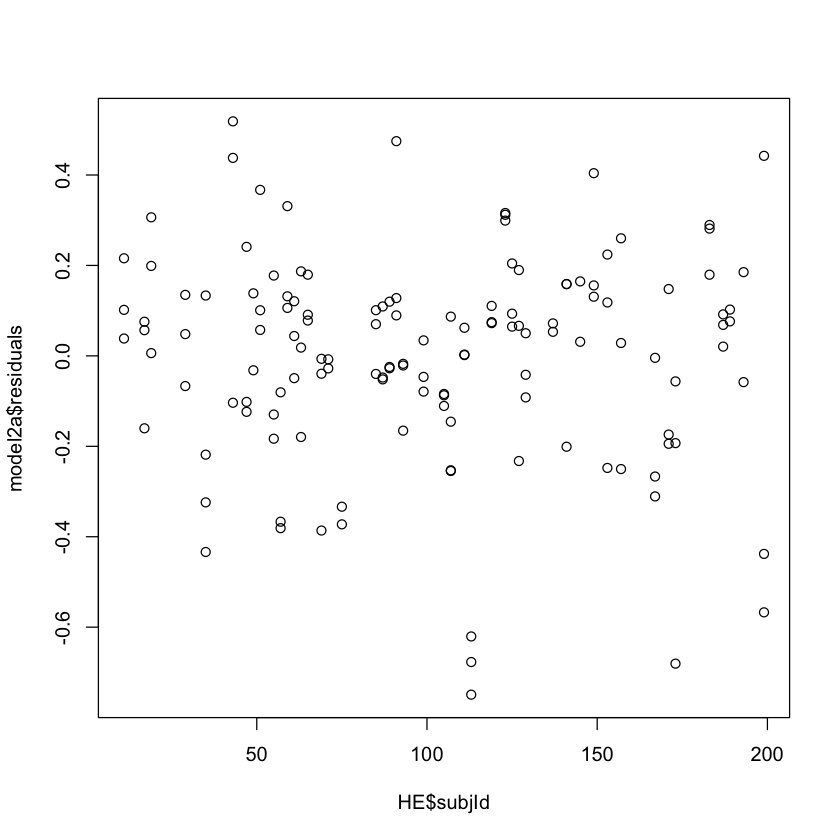

In [55]:
plot(HE$subjId,model2a$residuals)

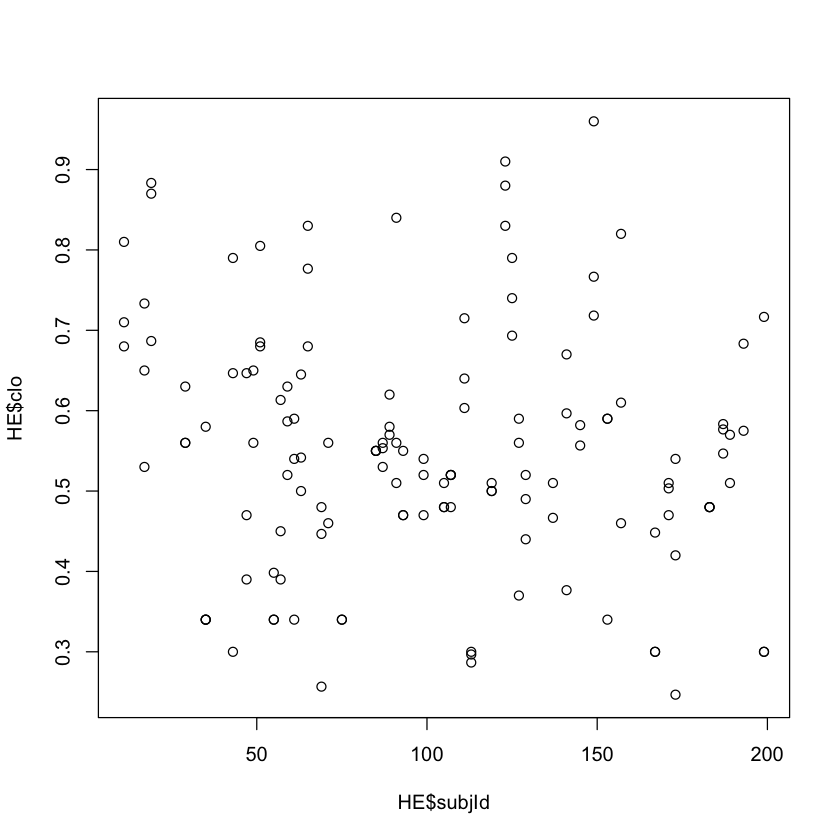

In [56]:
plot(HE$subjId,HE$clo)


Call:
lm(formula = log(clo) ~ sex + tOut + tInOp + subjId, data = HE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76024 -0.14728  0.04642  0.14257  0.49305 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.109928   0.448568   2.474  0.01462 *  
sexmale     -0.113945   0.041784  -2.727  0.00727 ** 
tOut        -0.029553   0.005806  -5.090 1.21e-06 ***
tInOp       -0.038380   0.018624  -2.061  0.04130 *  
subjId      -0.000239   0.000405  -0.590  0.55604    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2386 on 131 degrees of freedom
Multiple R-squared:  0.3376,	Adjusted R-squared:  0.3174 
F-statistic: 16.69 on 4 and 131 DF,  p-value: 4.435e-11


ERROR: Error in qqPlot(model20, reps = 10000): could not find function "qqPlot"


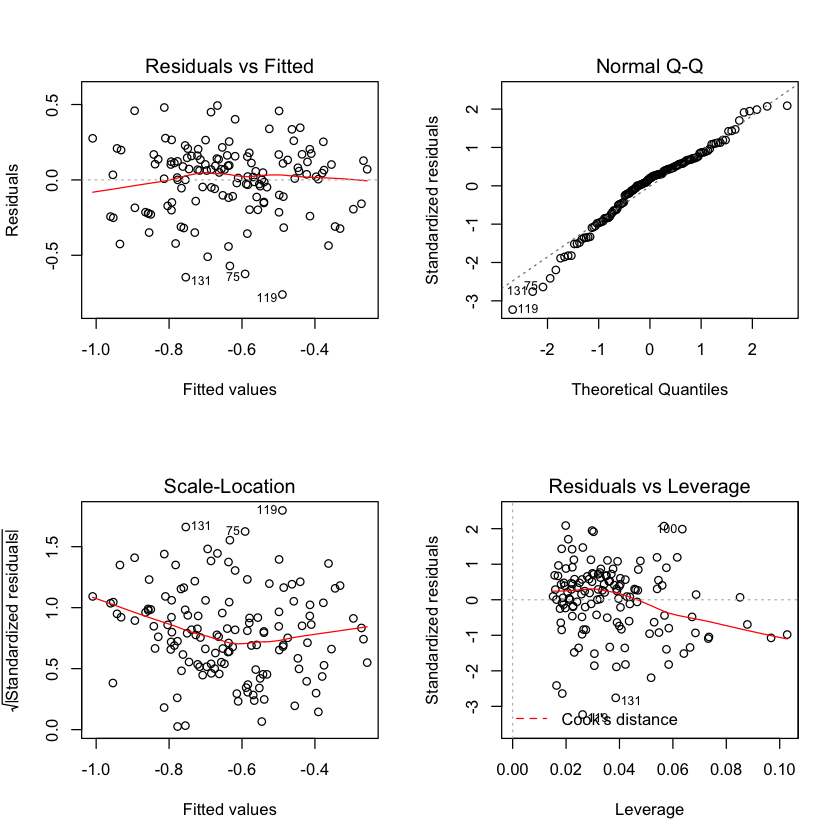

In [47]:
model20<-lm(log(clo)~sex+tOut+tInOp+subjId, data = HE)
summary(model20)
par(mfrow=c(2,2))
plot(model20)
qqPlot(model20,reps=10000)
qqPlot(model20,simulate=FALSE)

### Problem B: Including subject Id

In [27]:
table <- table(HE$subjId, HE$sex)

### Visualizations

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”

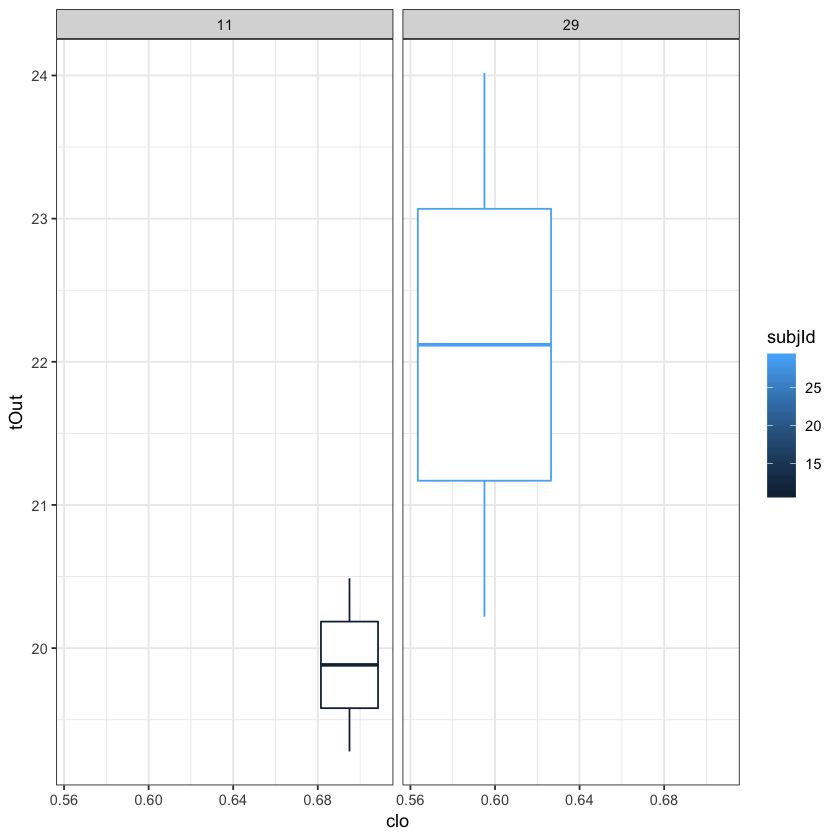

In [28]:
library(ggplot2)
qplot(clo, tOut, facets = . ~ subjId, colour = subjId, geom = "boxplot", data = subset(HE,subjId==c(11, 29))) + theme_bw()

In [29]:
cbind(with(HE, aggregate(tOut ~ subjId, FUN = "mean")),with(HE, aggregate(clo ~ subjId, FUN = "mean")))

subjId,tOut,subjId,clo
11,19.15951,11,0.7333333
17,20.18804,17,0.6377778
19,16.36067,19,0.8133333
29,22.84365,29,0.5833333
35,21.74722,35,0.4000000
43,28.60078,43,0.5788889
47,24.34119,47,0.5022222
49,19.12215,49,0.6050000
51,19.66243,51,0.7233333
55,29.50992,55,0.3594444


### Add subjectID in the model

In [44]:
library(lmerTest)
rs_subj_reml = lmer(clo ~ tInOp + tOut + (1 | subjId), data = HE)  # you have to re-run lmer now!
anova(rs_subj_reml, ddf = "Kenward-Roger")

ERROR: Error in library(lmerTest): there is no package called ‘lmerTest’


### or, use model comparison!

In [33]:
rs_subj_tInOp_tOut_ml = lmer(clo ~ tInOp + tOut + (1 | subjId), REML = FALSE, data = HE)
rs_subj_tOut_ml = lmer(clo ~ 1 + tOut + (1 | subjId), REML = FALSE, data = HE)
anova(rs_subj_tInOp_tOut_ml, rs_subj_tOut_ml)

rs_subj_tInOp_ml = lmer(clo ~ 1 + tInOp + (1 | subjId), REML = FALSE, data = HE)
anova(rs_subj_tInOp_tOut_ml, rs_subj_tInOp_ml)

ERROR: Error in lmer(clo ~ tInOp + tOut + (1 | subjId), REML = FALSE, data = HE): could not find function "lmer"


### Problem C: The full data-set